# Portfolio Optimization

Model:

https://en.wikipedia.org/wiki/Modern_portfolio_theory#Efficient_frontier_with_no_risk-free_asset

In [1]:
using JuMP, Ipopt, Interact, Gadfly, Distributions
#set_default_plot_size(24cm, 16cm)

  likely near /home/cavani/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/cavani/.julia/v0.4/Interact/src/IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/cavani/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/cavani/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/cavani/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


In [2]:
# Number of Assets and history of returns (column-oriented)
n = 10

dr = Normal(2, 3)
μr = rand(dr, n)

values = map(μr) do r
    dri = Normal(r, 3)
    rand(dri, 100)
end
data = hcat(values...)

100x10 Array{Float64,2}:
  4.66101    -0.819454    5.7861   …  -0.308636   5.88027    -1.59631  
 -1.54959    -1.06211     4.83053      1.17296   -0.0400739  -4.09931  
  5.80949     2.13716     8.3207       4.98745    6.08671    -1.52693  
  3.28484     1.2969      9.10287      0.562819   3.51789    -0.836991 
  0.491343    4.55163     8.87144     -5.80996    2.04233    -2.37785  
  1.17184    -5.28898     3.60776  …   5.13735    3.45014     3.62267  
 -3.84301    -6.56778     6.28817     -3.60962    5.95264     1.01852  
  2.47117    -1.10339     4.38198      4.31641    2.91472     4.54402  
 -2.36023    -2.63475     3.01456      3.69604    2.65283    -0.542507 
 -3.12515    -1.76875     4.43004      1.30914   -1.95169    -1.62325  
 -2.79055     3.68712     6.76813  …  -0.408803   0.157195   -2.59151  
 -1.38428     4.48719     5.84197     -2.40906   -0.559305    5.34117  
  5.95511    -1.16111     3.34728     -2.92847    3.67191    -0.0498852
  ⋮                                ⋱   

In [3]:
# μ - vector of expected returns
# Σ - covariance matrix for the returns
μ, Σ = vec(mean(data, 1)), cov(data)

([1.4682266201267922,-0.6605323299549413,6.0962901583133435,2.795359549290395,-1.4755579859005103,3.046028617154808,-0.1332820665646982,0.6282951374859232,3.043882245904447,-0.16052852584871896],
10x10 Array{Float64,2}:
  8.13061    -0.660211    0.472874   …   0.306786    0.0908075  -0.290978 
 -0.660211    8.14866     0.0543586     -1.91489     0.220574   -1.94381  
  0.472874    0.0543586   7.65225       -1.12511     0.587518   -0.0811723
  1.02538    -0.390722    0.355002       0.0633677   0.275795    0.844343 
  0.285479    0.742369   -0.906756      -0.520596   -0.94849    -0.0925548
  1.50655     1.0968      1.21591    …  -1.47276     0.400342    0.043731 
 -1.53524     0.105425   -0.270161       1.90013     0.745128    0.841249 
  0.306786   -1.91489    -1.12511        9.68128    -0.86185     0.0300324
  0.0908075   0.220574    0.587518      -0.86185     6.95463    -0.438349 
 -0.290978   -1.94381    -0.0811723      0.0300324  -0.438349    8.01147  )

In [4]:
# mininum expected return on the portfolio
r_min = 1.5

p = Model()
#p = Model(solver = IpoptSolver(print_level=0))
@defVar(p, 0 ≤ x[1:n] ≤ 1)
@addConstraint(p, sum(x) == 1)
@addConstraint(p, μ ⋅ x ≥ r_min)
@setObjective(p, Min, sum{Σ[i,j] * x[i] * x[j], i=1:n, j=1:n})
solve(p)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.1, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       10
Number of nonzeros in inequality constraint Jacobian.:       10
Number of nonzeros in Lagrangian Hessian.............:      100

Total number of variables............................:       10
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       10
                     variables with only upper bounds:        0
Total number of equa

:Optimal

In [5]:
getValue(x)

10-element Array{Float64,1}:
 0.0836325
 0.124675 
 0.130714 
 0.0866438
 0.0999122
 0.0483073
 0.0751248
 0.118839 
 0.122764 
 0.109388 

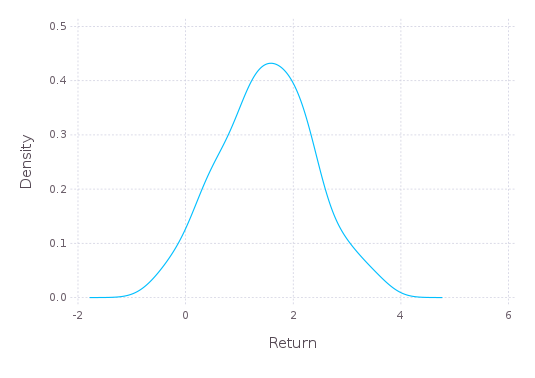

In [6]:
plot(x = data * getValue(x), Geom.density, Guide.xlabel("Return"), Guide.ylabel("Density"))

Interact.Slider{Float64}([Reactive.Input{Float64}] 1.5,"r_min",1.5,1.0:0.1:2.0)

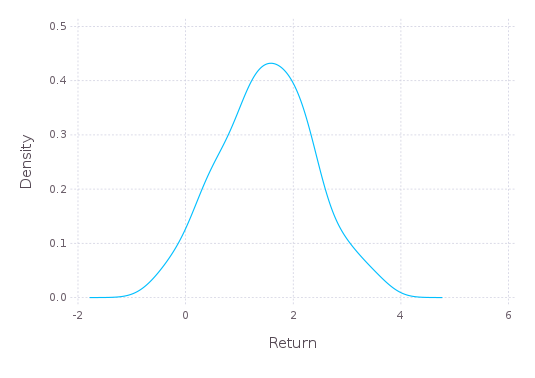

In [7]:
@manipulate for r_min=1.0:0.1:2.0
    p = Model(solver = IpoptSolver(print_level=0))
    @defVar(p, 0 ≤ x[1:n] ≤ 1)
    @addConstraint(p, sum(x) == 1)
    @addConstraint(p, μ ⋅ x ≥ r_min)
    @setObjective(p, Min, sum{Σ[i,j] * x[i] * x[j], i=1:n, j=1:n})
    solve(p)
    
    plot(x = data * getValue(x), Geom.density, Guide.xlabel("Return"), Guide.ylabel("Density"))
end